In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Functions.databuilder import dataBuilder
from Functions.data_preparation_for_ut import data_preparation_for_ut
from Functions.ut_plots import ut_plot

from scipy.special import kl_div,softmax

import warnings
warnings.filterwarnings('ignore')

np.random.seed(37)

In [2]:
sample_data = dataBuilder('293533')

num_rows = 536576

template = pd.DataFrame(index=np.arange(0,num_rows))

template[['ChannelID','ChipID','Sector','ChannelNumber','Staves','Rows','SensorType']] = sample_data[
    ['ChannelID','ChipID','Sector','ChannelNumber','Staves','Rows','SensorType']]


stats = {
    "Signal": {"mean": 0.000008, "std": 0.247662, "min": -0.878614, "max": 0.868103},
    "CMSubstracted": {"mean": 0.773838, "std": 0.089710, "min": 0.186300, "max": 4.108770},
    "ChipMean": {"mean": -0.004794, "std": 0.128758, "min": -0.370535, "max": 0.349568},
    "ChipSigma": {"mean": 0.935665, "std": 0.136474, "min": 0.299216, "max": 1.521380},
    "PedestalValue": {"mean": 0.497605, "std": 3.209989, "min": -30.0, "max": 31.0},
    "Sigma": {"mean": 0.496799, "std": 3.199347, "min": -30.0, "max": 31.0},
    "STD": {"mean": 0.901343, "std": 0.251579, "min": 0.0, "max": 3.947160},
}


synthetic_data_ = {
    "Signal": np.random.normal(stats["Signal"]["mean"], stats["Signal"]["std"], num_rows),
    "CMSubstracted": np.random.normal(stats["CMSubstracted"]["mean"], stats["CMSubstracted"]["std"], num_rows),
    "ChipMean": np.random.normal(stats["ChipMean"]["mean"], stats["ChipMean"]["std"], num_rows),
    "ChipSigma": np.random.normal(stats["ChipSigma"]["mean"], stats["ChipSigma"]["std"], num_rows),
    "PedestalValue": np.random.normal(stats["PedestalValue"]["mean"], stats["PedestalValue"]["std"], num_rows),

    "Sigma": np.random.normal(stats["Sigma"]["mean"], stats["Sigma"]["std"], num_rows),

    "STD": np.random.normal(stats["STD"]["mean"], stats["STD"]["std"], num_rows)
}

synthetic_data = pd.concat([template,pd.DataFrame(synthetic_data_)],axis=1)


In [3]:
import os
path_ = './Plots/06SimulationDataAnalysis'
os.makedirs(path_,exist_ok=True)

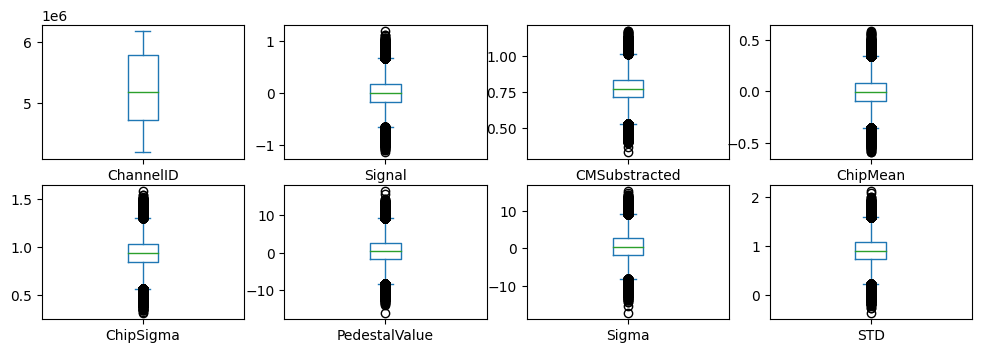

In [4]:
synthetic_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,8))
plt.savefig(f'{path_}/SimulationsDataBoxPlots.png')
plt.show()

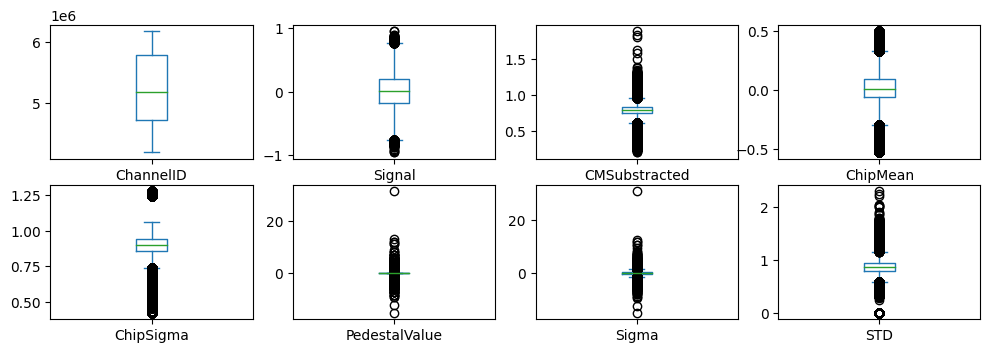

In [5]:
sample_data.plot(kind='box',subplots=True,layout=(4,4),figsize=(12,8))
plt.savefig(f'{path_}/SampleDataBoxPlots.png')
plt.show()

In [6]:
nzs_data_ = sample_data[['Sector','Staves','Rows','PedestalValue']]
syn_data_ = synthetic_data[['Sector','Staves','Rows','PedestalValue']]

nzs_data_ = nzs_data_[nzs_data_['Sector'].str.startswith('UTaX')]
syn_data_ = syn_data_[syn_data_['Sector'].str.startswith('UTaX')]

In [7]:
#Looping to see changes.

In [8]:
#Test Case 1 : Introducing Multiple number of  Outliers with value 100
#Scaling to Probabilities to both
base_data = nzs_data_.copy()
test_data = nzs_data_.copy()

for i in np.arange(1,11):
    np.random.seed(37)
    random_index = np.random.randint(low=0,high=len(nzs_data_),size=i)
    test_data['PedestalValue'].iloc[random_index] = 100
    


    #Preparing to the dimension of UT and Normalising it per stave.
    dataset1 = softmax(data_preparation_for_ut(base_data).fillna(0))
    dataset2 = softmax(data_preparation_for_ut(test_data).fillna(0))

    ut_plot(kl_div(dataset1,dataset2),path=f'{path_}/Testcase1',filename=f'Test{i}',save_fig=True,vmin_vmax_scaled=True)

In [9]:
#Test Case 2 : Introducing 3 Outliers with value Multiple values for outliers
#Scaling to Probabilities to both
base_data = nzs_data_.copy()
test_data = nzs_data_.copy()

for i in np.arange(1,11):
    np.random.seed(37)
    random_index = np.random.randint(low=0,high=len(nzs_data_),size=3)
    test_data['PedestalValue'].iloc[random_index] = 10+i


    #Preparing to the dimension of UT and Normalising it per stave.
    dataset1 = softmax(data_preparation_for_ut(base_data).fillna(0))
    dataset2 = softmax(data_preparation_for_ut(test_data).fillna(0))

    ut_plot(kl_div(dataset1,dataset2),path=f'{path_}/Testcase2',filename=f'Test{i}',save_fig=True,vmin_vmax_scaled=True)

In [10]:
#Test Case 3 : When test run is all zero values.
#Scaling to Probabilities to both
base_data = nzs_data_.copy()
test_data = nzs_data_.copy()

for i in np.arange(1,11):
    test_data['PedestalValue'] = 0

    #Preparing to the dimension of UT and Normalising it per stave.
    dataset1 = softmax(data_preparation_for_ut(base_data).fillna(0))
    dataset2 = softmax(data_preparation_for_ut(test_data).fillna(0))

    ut_plot(kl_div(dataset1,dataset2),path=f'{path_}/Testcase3',filename=f'Test{i}',save_fig=True)

In [11]:
#Test Case 4 : When test run has Systematic Shift
#Scaling to Probabilities to both
base_data = nzs_data_.copy()
test_data = nzs_data_.copy()


for i in np.arange(1,1.1,0.01):
    test_data['PedestalValue'] = i*test_data['PedestalValue']

    
    #Preparing to the dimension of UT and Normalising it per stave.
    dataset1 = softmax(data_preparation_for_ut(base_data).fillna(0))
    dataset2 = softmax(data_preparation_for_ut(test_data).fillna(0))

    ut_plot(kl_div(dataset1,dataset2),path=f'{path_}/Testcase4',filename=f'Test{i}',save_fig=True,show_fig=False,vmin_vmax_scaled=True)